In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# compiling all of the datasets that i need for this analysis

In [5]:
files=[file for file in os.listdir('D:\mypython\Sales_Data')]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [7]:
path='D:\mypython\Sales_Data'
all_data=pd.DataFrame()

for file in files:
    current_df=pd.read_csv(path+"/"+file)
    all_data=pd.concat([all_data,current_df])
    
all_data.shape

(373700, 6)

In [9]:
all_data.to_csv(r'D:\mypython\Sales_Data\all_data.csv',index=False)

In [10]:
all_data.isna().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [11]:
all_data=all_data.dropna(how='all')

In [13]:
all_data.shape

(372610, 6)

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


# in which month people order the most

In [16]:
'04/19/19 08:46'.split('/')[0]

'04'

In [17]:
def month(x):
    return x.split('/')[0]

In [18]:
all_data['month']=all_data['Order Date'].apply(month)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [22]:
all_data['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [21]:
filter=all_data['month']=='Order Date'
all_data=all_data[~filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [23]:
all_data['month']=all_data['month'].astype(int)

In [24]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [26]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [27]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [28]:
all_data['total_sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [31]:
all_data.groupby('month')['total_sales'].sum()

month
1     3.644513e+06
2     4.404045e+06
3     5.614201e+06
4     6.781340e+06
5     6.305214e+06
6     5.155605e+06
7     5.295552e+06
8     4.488936e+06
9     4.195120e+06
10    7.473454e+06
11    6.399206e+06
12    9.226887e+06
Name: total_sales, dtype: float64

Text(0, 0.5, 'sales in USD')

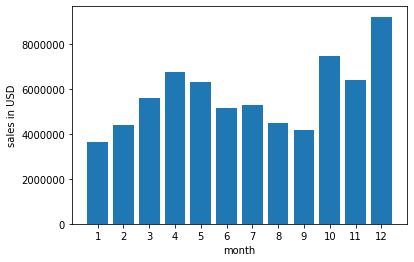

In [35]:
month=range(1,13)
plt.bar(month,all_data.groupby('month')['total_sales'].sum())
plt.xticks(month)
plt.xlabel('month')
plt.ylabel('sales in USD')

In [36]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# Let's look into the city that genarates most sales.

In [48]:
'682 Chestnut St, Boston, MA 02215'.split(',')[1]

' Boston'

In [49]:
def city(x):
    return x.split(',')[1]

In [50]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


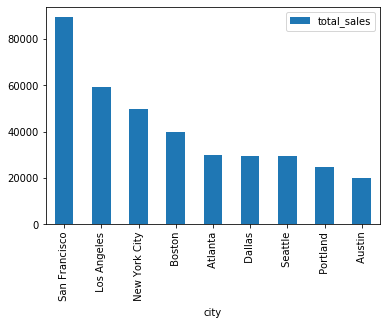

In [56]:
(all_data.
 groupby(["city"])[["total_sales"]].count()
 .sort_values('total_sales',ascending=False)
).plot.bar();

# At which time of the day people order the most

In [58]:
all_data['hour_of_day']=pd.to_datetime(all_data['Order Date']).dt.hour

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales,city,hour_of_day
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


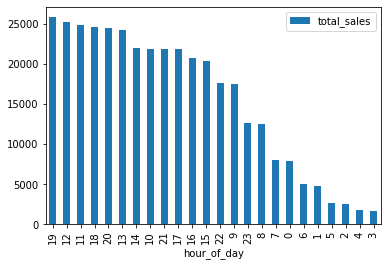

In [68]:
(all_data.
 groupby(["hour_of_day"])[["total_sales"]].count()
 .sort_values('total_sales',ascending=False)
).plot.bar();

# Let's look into the products which sold the most and analyze why!

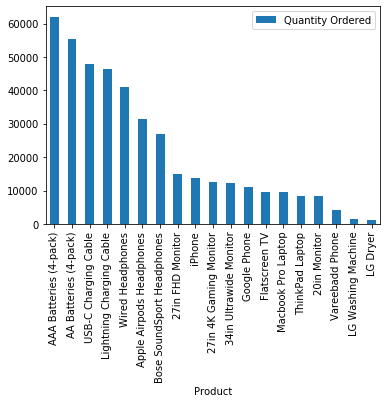

In [71]:
(all_data.
 groupby(["Product"])[["Quantity Ordered"]].sum()
 .sort_values('Quantity Ordered',ascending=False)
).plot.bar();

# As we can see the most sold product has the least avg price tag.

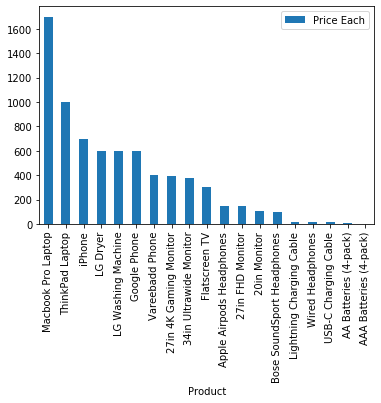

In [72]:
(all_data.
 groupby(["Product"])[["Price Each"]].mean()
 .sort_values('Price Each',ascending=False)
).plot.bar();

# Let's look into those products which are getting sold togeather.

In [119]:
duplicate = all_data[all_data.duplicated(['Order ID'])]

In [120]:
duplicate['grouped']=duplicate.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
duplicate.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales,city,hour_of_day,grouped
252,176797,Wired Headphones,1,11.99,04/21/19 08:54,"923 Elm St, Los Angeles, CA 90001",4,11.99,Los Angeles,8,"Wired Headphones,Google Phone,Bose SoundSport ..."
637,177167,AAA Batteries (4-pack),3,2.99,04/28/19 16:40,"39 Lakeview St, Boston, MA 02215",4,8.97,Boston,16,"AAA Batteries (4-pack),iPhone,Apple Airpods He..."
851,177367,Bose SoundSport Headphones,1,99.99,04/05/19 07:52,"141 Chestnut St, San Francisco, CA 94016",4,99.99,San Francisco,7,"Bose SoundSport Headphones,Google Phone,USB-C ..."
1309,177800,Wired Headphones,1,11.99,04/03/19 11:56,"880 9th St, Portland, ME 04101",4,11.99,Portland,11,"Wired Headphones,Google Phone,USB-C Charging C..."
1683,178158,Wired Headphones,1,11.99,04/28/19 21:13,"197 Center St, San Francisco, CA 94016",4,11.99,San Francisco,21,"Wired Headphones,USB-C Charging Cable,Google P..."


In [122]:
duplicate=duplicate.drop_duplicates(subset=['Order ID'])

In [123]:
duplicate.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales,city,hour_of_day,grouped
252,176797,Wired Headphones,1,11.99,04/21/19 08:54,"923 Elm St, Los Angeles, CA 90001",4,11.99,Los Angeles,8,"Wired Headphones,Google Phone,Bose SoundSport ..."
637,177167,AAA Batteries (4-pack),3,2.99,04/28/19 16:40,"39 Lakeview St, Boston, MA 02215",4,8.97,Boston,16,"AAA Batteries (4-pack),iPhone,Apple Airpods He..."
851,177367,Bose SoundSport Headphones,1,99.99,04/05/19 07:52,"141 Chestnut St, San Francisco, CA 94016",4,99.99,San Francisco,7,"Bose SoundSport Headphones,Google Phone,USB-C ..."
1309,177800,Wired Headphones,1,11.99,04/03/19 11:56,"880 9th St, Portland, ME 04101",4,11.99,Portland,11,"Wired Headphones,Google Phone,USB-C Charging C..."
1683,178158,Wired Headphones,1,11.99,04/28/19 21:13,"197 Center St, San Francisco, CA 94016",4,11.99,San Francisco,21,"Wired Headphones,USB-C Charging Cable,Google P..."


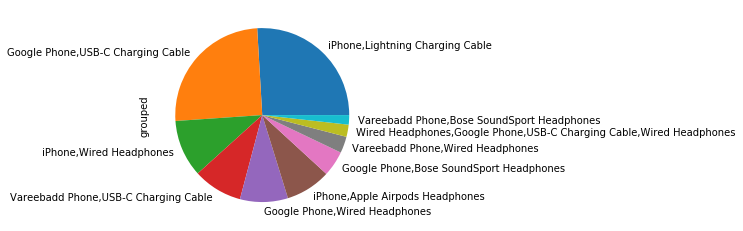

In [130]:
duplicate['grouped'].value_counts()[0:10].plot.pie();

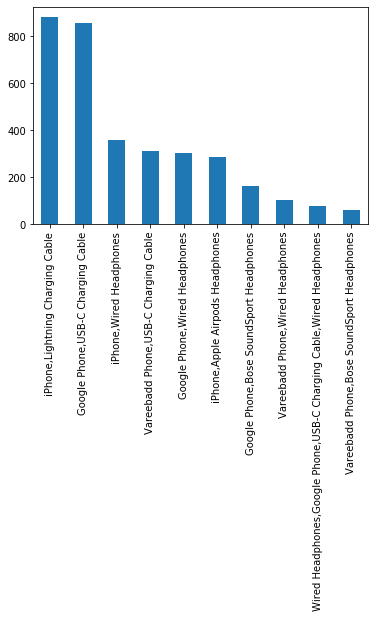

In [129]:
duplicate['grouped'].value_counts()[0:10].plot.bar();